In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv("data/desafio_indicium_imdb.csv", index_col=0)

In [164]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


Pode-se visualizar que o dataset é ordenado com base em IMDB_rating, de forma descendente.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [166]:
# df['Released_Year'].astype(int, errors='raise')
# Essa linha retorna um erro que 'PG' não pode virar integer

In [167]:
# Checando se tem algum outro valor que não é ano
df['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [168]:
# Será que houve um erro de leitura? 'PG' é um valor válido para Certificate
df[df['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Apollo 13 foi um filme de 1995.

In [169]:
# Editar o valor de Released_Year de 'Apollo 13'
df.loc[df["Series_Title"] == "Apollo 13", "Released_Year"] = 1995
df[df['Series_Title']=='Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [170]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [171]:
# Transformando a coluna 'Runtime' em numérica, removendo o texto ' min'
df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)

df['Gross'] = df['Gross'].str.replace(",", "").astype(float) # float64 pra aceitar os NaN, usar int dá erro

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 124.9+ KB


In [173]:
nrows_df = df.shape[0]
nrows_df_na = df[df.isna().any(axis=1)].shape[0]

perc_na = 100 * (nrows_df_na)/nrows_df
print(f"{perc_na:.2f}% das linhas têm algum valor faltante em df")

28.63% das linhas têm algum valor faltante em df


In [174]:
print(f"{df.duplicated().sum()} linhas duplicadas em df")

0 linhas duplicadas em df


<Axes: xlabel='Certificate', ylabel='Gross'>

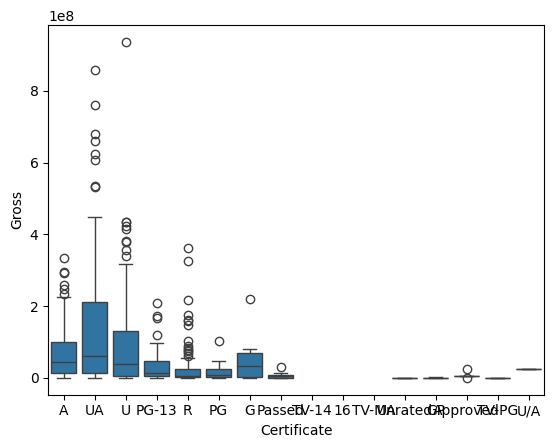

In [175]:
sns.boxplot(data=df, x=df['Certificate'], y=df['Gross'])

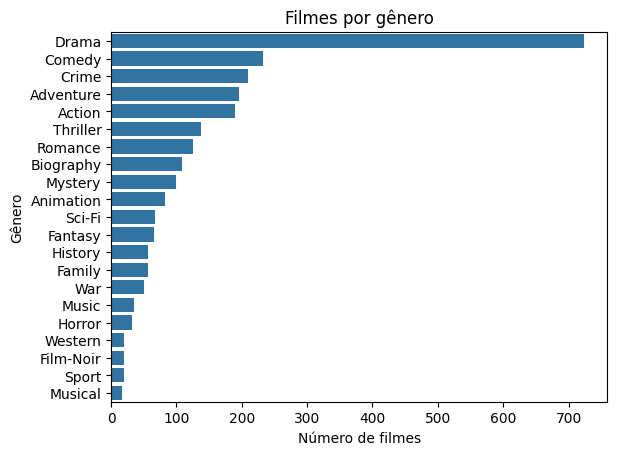

In [176]:
df_exploded = df["Genre"].str.split(",").explode().str.strip()

genre_counts = df_exploded.value_counts().reset_index()

sns.barplot(genre_counts, y=genre_counts['Genre'], x=genre_counts['count'])
plt.ylabel("Gênero")
plt.xlabel("Número de filmes")
plt.title("Filmes por gênero")
plt.show()

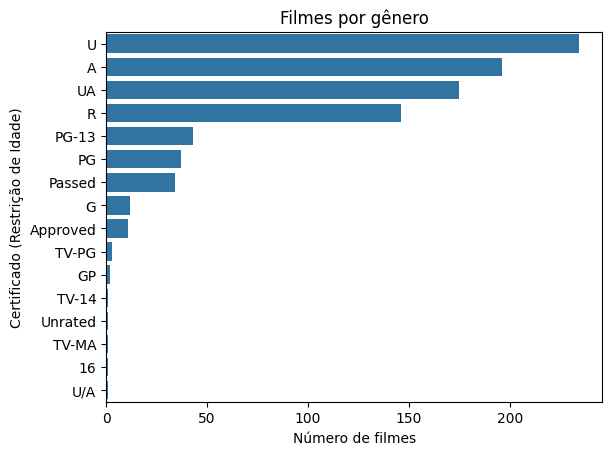

In [177]:
certificate_counts = df['Certificate'].value_counts().reset_index()

sns.barplot(certificate_counts, y=certificate_counts['Certificate'], x=certificate_counts['count'])
plt.ylabel("Certificado (Restrição de Idade)")
plt.xlabel("Número de filmes")
plt.title("Filmes por gênero")
plt.show()

In [180]:
actors = df.melt(
    id_vars=["Series_Title"], 
    value_vars=["Star1", "Star2", "Star3", "Star4"],
    value_name="Actor"
)["Actor"]

actor_counts = actors.value_counts()

actor_counts

Actor
Robert De Niro       17
Tom Hanks            14
Al Pacino            13
Brad Pitt            12
Clint Eastwood       12
                     ..
Pascal Benezech       1
John Heard            1
Rene Auberjonois      1
Ricardo Montalban     1
Mitchell Ryan         1
Name: count, Length: 2707, dtype: int64